# Collect and Plot data from simulation parametric sweeps

In [49]:
# Collate data from parametric sweeps for combined analysis plots
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
from tqdm import tqdm
import pandas as pd

from joblib import Parallel, delayed
import multiprocessing
%matplotlib notebook
plt.close('all')

# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import cm
from tqdm import tqdm

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 14})



In [21]:
# Folder containing data
# data_folder = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/BendingStiffnessSweeps/b0_4_activity_time_2000'

# data_folder = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/BendingStiffnessSweeps/b0_2_1/activity_time_750'
# data_folder = '/media/deepak/DEEPAK-1TB/ActiveFilaments_Simulations_Backup/BendingStiffnessSweeps/b0_4_activity_time_2000/2021-02-27'

# data_folder = '/media/deepak/DEEPAK-1TB/ActiveFilaments_Simulations_Backup/BendingStiffnessSweeps/b0_4_activity_time_2000'
# data_folder = '/media/deepak/DEEPAK-1TB/ActiveFilaments_Simulations_Backup/BendingStiffnessSweeps/AnalysisData'

# data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/BendingStiffnessSweeps/b0_2_1_FullSweep_Final/activity_time_750'

# data_folder = '/home/deepak/Dropbox/LacryModeling/ModellingResults/StochasticActivity/NormalDistribution'

# Parameters that are saved in the final dataframe
parameter = 'spring constant'
data_name = 'Unique positions count'

df_param_sweep = {}

# Interpolation for time-series data
n_times = 1000

mu  = 1/6
radius = 1
b0 = 4*radius
L = 32*b0
D0 = 1.5


# Find all simulation data files and create a list
files_list = []
 # Walk through the folders and identify the simulation data files
for dirs, subdirs, files in os.walk(data_folder, topdown=False):
   
    root, subFolderName = os.path.split(dirs)
 
    if('SearchCoverage' in subFolderName):
        
        root, *rest = os.path.split(root)
   
        # Get the metadata for this condition
        df_metadata = pd.read_csv(os.path.join(root, 'metadata.csv'))
           
        print(df_metadata['spring constant'][0])
        activity_time = df_metadata[' activity time scale'][0]
        Np =  df_metadata['N particles'][0]
        b0 =  df_metadata['bond length'][0]
        
        df_param_sweep[df_metadata[parameter][0]] = pd.DataFrame({})
        
        count = 1
        for file in files:
            if('timeseries' in file):
                # Load the time-series data
                df_current = pd.read_csv(os.path.join(dirs,file))
                time = df_current['Time']
                data = df_current[data_name]
                
                data_fun = interpolate.interp1d(time, data, kind = 'linear')
                
                time_vect_sampled = np.linspace(np.min(time), np.max(time), n_times)
                
                data_sampled = data_fun(time_vect_sampled)
                
                df_sampled = pd.DataFrame({'Time':time_vect_sampled, 'Initial condition': np.repeat(count, n_times), data_name: data_sampled})
                df_param_sweep[df_metadata[parameter][0]] = df_param_sweep[df_metadata[parameter][0]].append(df_sampled)
                count +=1 
    
# # for file in tqdm(files_list):
	
# def run_filament_analysis(file):
# 	print('Analyzing file ...')
# 	print(file)

# 	filament = analysis.analysisTools(file = file)
# 	filament.filament_tip_coverage(save = True)


# num_cores = multiprocessing.cpu_count()

# num_cores = 12

# results = Parallel(n_jobs=num_cores,  verbose=10)(delayed(run_filament_analysis)(file) for file in tqdm(files_list))


35.0
17.5
25.0
27.5
20.0
37.5
32.5
15.0
45.0
22.5
40.0
30.0


In [22]:
df_param_sweep

{35.0:               Time  Initial condition  Unique positions count
 0         0.000000                  1                     1.0
 1       374.151153                  1                     8.0
 2       748.302307                  1                    22.0
 3      1122.453460                  1                    28.0
 4      1496.604614                  1                    40.0
 ..             ...                ...                     ...
 995  372280.397662                  1                   964.0
 996  372654.548815                  1                   964.0
 997  373028.699969                  1                   964.0
 998  373402.851122                  1                   964.0
 999  373777.002276                  1                   964.0
 
 [1000 rows x 3 columns],
 17.5:               Time  Initial condition  Unique positions count
 0         0.000000                  1                1.000000
 1       373.756420                  1               24.537538
 2       747.51

In [23]:
# Path for saving data
# save_folder = '/home/deepak/Dropbox/LacryModeling/ModellingResults/Plots/CombinedAnalysis'
save_folder = '/home/deepak/Dropbox/LacryModeling/AnalysisResults/CombinedAnalysis'
len(df_param_sweep)

12

In [33]:
df_param_sweep

{35.0:               Time  Initial condition  Unique positions count
 0         0.000000                  1                     1.0
 1       374.151153                  1                     8.0
 2       748.302307                  1                    22.0
 3      1122.453460                  1                    28.0
 4      1496.604614                  1                    40.0
 ..             ...                ...                     ...
 995  372280.397662                  1                   964.0
 996  372654.548815                  1                   964.0
 997  373028.699969                  1                   964.0
 998  373402.851122                  1                   964.0
 999  373777.002276                  1                   964.0
 
 [1000 rows x 3 columns],
 17.5:               Time  Initial condition  Unique positions count
 0         0.000000                  1                1.000000
 1       373.756420                  1               24.537538
 2       747.51

# Time series of unique locations sampled

## Plot the time-series of unique locations sampled

<IPython.core.display.Javascript object>


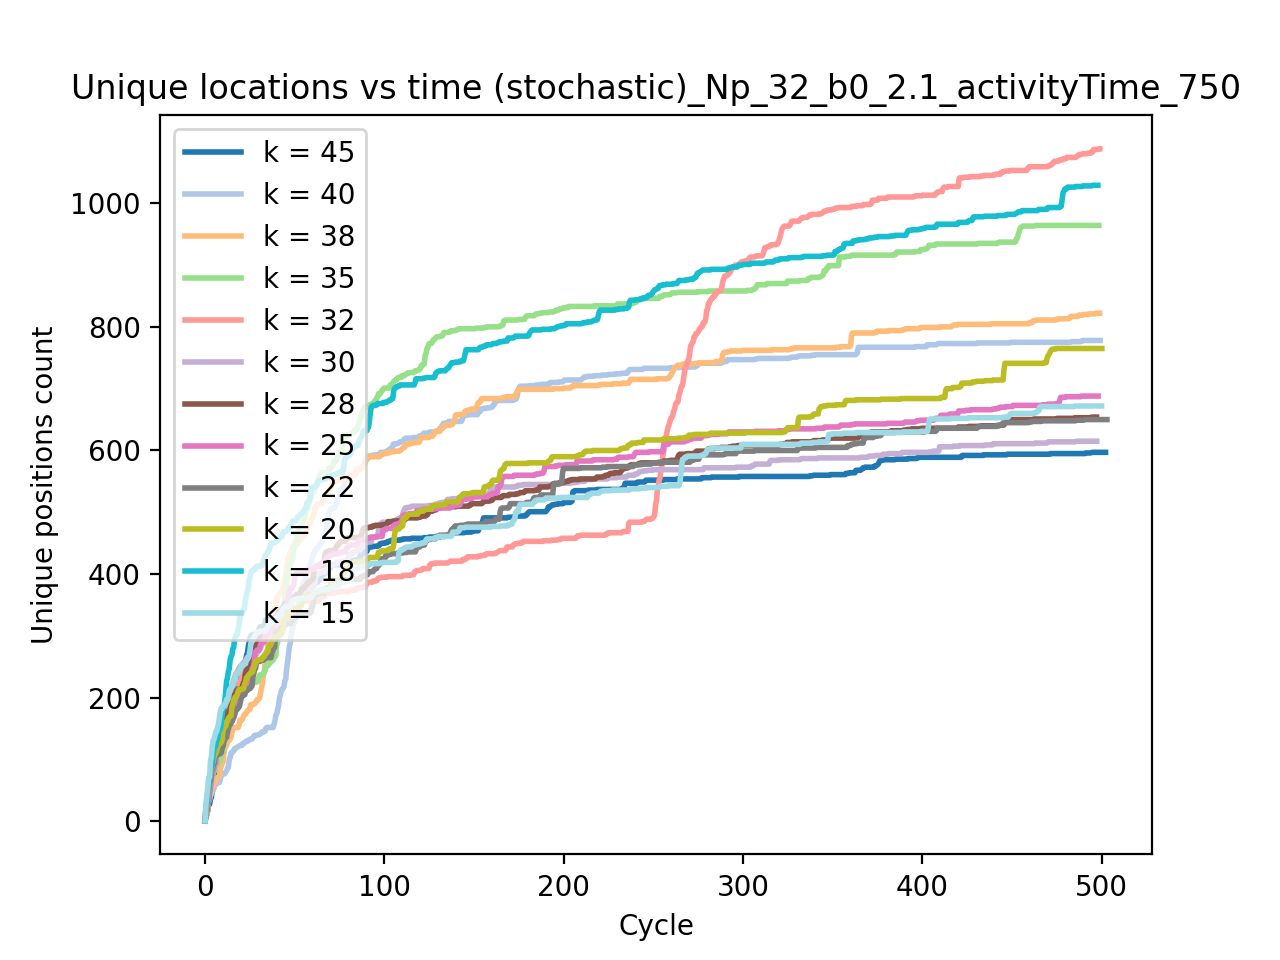

100%|██████████| 12/12 [00:00<00:00, 21.28it/s]


In [35]:
# Plot the timer-series of unique locations sampled

# plt.style.use('dark_background')
plt.style.use('default')

cmap = cm.get_cmap('tab20')
# cmap = sns.color_palette("husl", 255, as_cmap = True)
colors = [cmap(ii) for ii in np.linspace(0,1, len(df_param_sweep))]

title = 'Unique locations vs time (stochastic)' + '_' + 'Np_{}'.format(Np) + '_' + 'b0_{}'.format(b0)+'_'+ 'activityTime_{}'.format(activity_time) 
plt.figure()
count = 0
for key in tqdm(sorted(df_param_sweep.keys(), reverse = True)):
    kappa = 0.25*key
    activity_number = (mu*radius**3*L**2*D0/kappa)
#     sns.lineplot(data = df_param_sweep[key], x = df_param_sweep[key]['Time']/activity_time, y = 'Unique positions count', color = colors[count], linewidth= 2, label = 'A = {}'.format(round(activity_number)))
    sns.lineplot(data = df_param_sweep[key], x = df_param_sweep[key]['Time']/activity_time, y = 'Unique positions count', color = colors[count], linewidth= 2, label = 'k = {}'.format(round(key)))

    count+=1

plt.title(title)
plt.xlabel('Cycle')
# plt.legend(loc=(1.04,0), borderaxespad = 0)
# plt.savefig(os.path.join(save_folder, title + '.png'), dpi = 300)
# plt.savefig(os.path.join(save_folder, title + '.svg'), dpi = 300)
plt.show()

# plt.xscale('log')
# plt.yscale('log')
# plt.savefig(os.path.join(save_folder, title +'loglog' + '.png'), dpi = 300)
# plt.savefig(os.path.join(save_folder, title + 'loglog' + '.svg'), dpi = 300)

    
    

# Max unique locations sampled

In [28]:
# Plot of max unique locations sampled vs filament stiffness
df_unique_locs = pd.DataFrame({})
for key in tqdm(sorted(df_param_sweep.keys())):
    
    n_init_cond = max(df_param_sweep[key]['Initial condition'])
    
    for ii in range(n_init_cond):
        
        max_data = np.max(df_param_sweep[key].loc[df_param_sweep[key]['Initial condition']==ii+1, data_name])
        kappa = 0.25*key
        activity_number = (mu*radius**3*L**2*D0/kappa)

        df_unique_locs = df_unique_locs.append(pd.DataFrame({parameter:[key], 'activity number': activity_number, 'Initial condition':[ii+1], data_name: [max_data], 'activity time':activity_time}))
    

df_unique_locs.to_csv(os.path.join(save_folder,'Max unique locations'+ '_' + 'Np_{}'.format(Np) + '_' + 'b0_{}'.format(b0)+'_'+ 'activityTime_{}'.format(activity_time)+'.csv'))

100%|██████████| 12/12 [00:00<00:00, 474.56it/s]


In [31]:
df_unique_locs

,spring constant,activity number,Initial condition,Unique positions count,activity time
0,15.0,1092.266667,1,672.0,750
0,17.5,936.228571,1,1029.0,750
0,20.0,819.200000,1,765.0,750
0,22.5,728.177778,1,650.0,750
0,25.0,655.360000,1,688.0,750
0,27.5,595.781818,1,654.0,750
0,30.0,546.133333,1,615.0,750
0,32.5,504.123077,1,1088.0,750
0,35.0,468.114286,1,964.0,750
0,37.5,436.906667,1,822.0,750


<IPython.core.display.Javascript object>


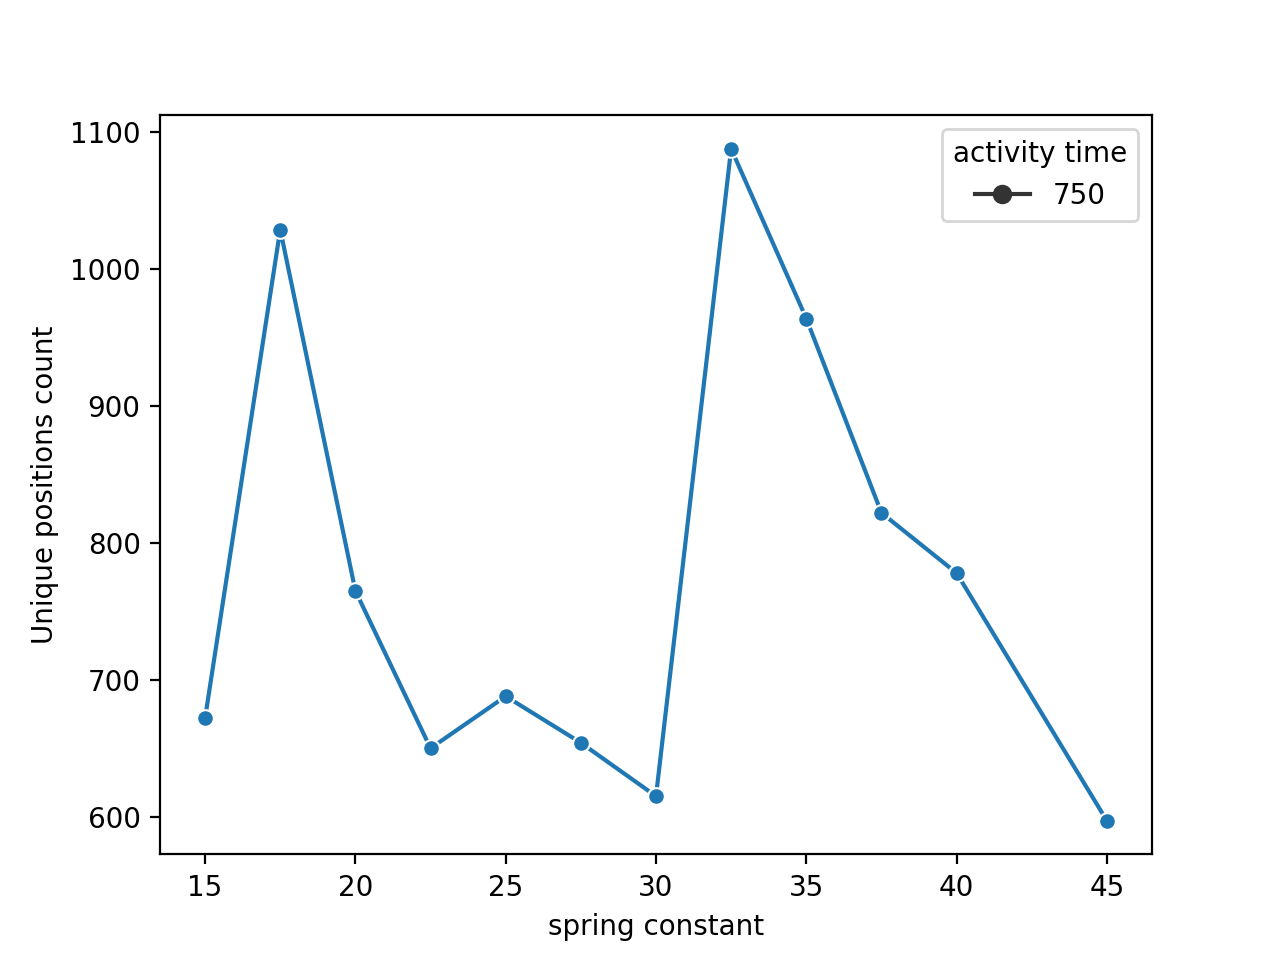

In [32]:
# plt.style.use('dark_background')
plt.style.use('default')


title = 'Max unique locations vs activity number'+ '_' + 'Np_{}'.format(Np) + '_' + 'b0_{}'.format(b0)+'_'+ 'activityTime_{}'.format(activity_time) 
plt.figure()
ax = sns.lineplot(data=df_unique_locs, x= 'spring constant', y= data_name, style='activity time', err_style="bars", ci="sd", markers=True)

# ax.set_xscale('log')
# plt.savefig(os.path.join(save_folder, title + '.png'), dpi = 300)
# plt.savefig(os.path.join(save_folder, title + '.svg'), dpi = 300)
plt.show()


In [117]:
# Plot unique locations vs stiffness for all activity time
folder = '/home/deepak/Dropbox/LacryModeling/ModellingResults/Plots/CombinedAnalysis/MaxUniqueLocations_combined_data'

files = os.listdir(folder)

df_combined = pd.DataFrame({})

for file in files:
    df = pd.read_csv(os.path.join(folder, file))
    df_combined = df_combined.append(df)

<IPython.core.display.Javascript object>


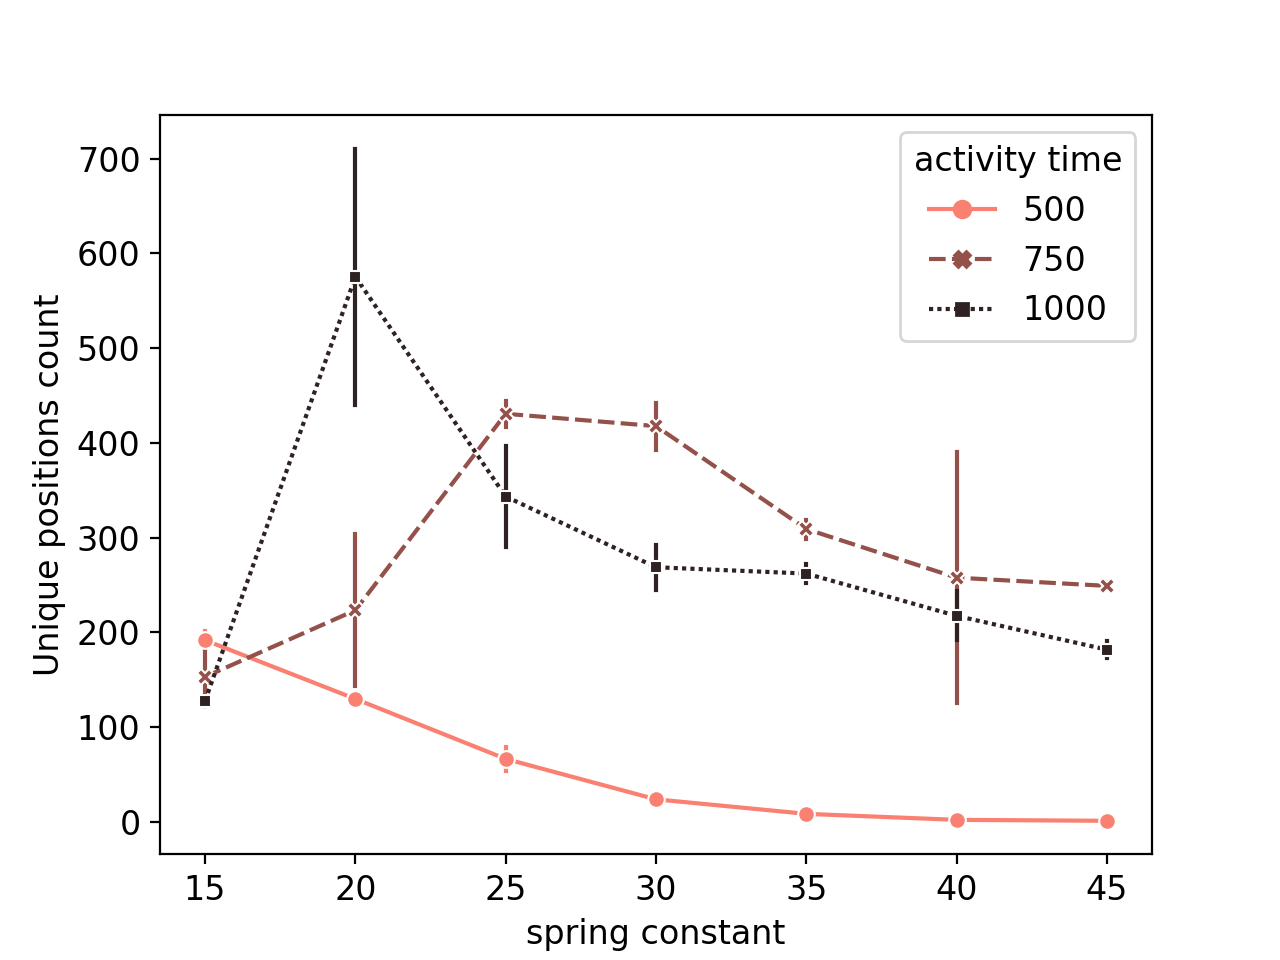

In [125]:
# Plot the unique locations vs stiffness for all activity time
title = 'Max unique locations vs filament stiffness_combined'+ '_' + 'Np_{}'.format(Np) + '_' + 'b0_{}'.format(b0)
plt.figure()
sns.lineplot(data=df_combined, x= parameter, y= data_name, style='activity time', hue = 'activity time', err_style="bars", ci="sd", markers=True, palette = "dark:salmon_r")
plt.savefig(os.path.join(save_folder, title + '.png'), dpi = 300)
plt.savefig(os.path.join(save_folder, title + '.svg'), dpi = 300)
plt.show()

# Plot search metrics and other dynamical measures as a function of one or more filament parameters

In [36]:
# Load all the analysis data and collate into a single data frame
data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/BendingStiffnessSweeps/b0_2_1_FullSweep_Final'
# Find all analysis data files and create a list
files_list = []
 # Walk through the folders and identify the simulation data files
for dirs, subdirs, files in os.walk(data_folder, topdown=False):

    root, subFolderName = os.path.split(dirs)

    for fileNames in files:
        if(fileNames.endswith('csv') and fileNames[0] != '.' and 'analysis' in fileNames):
            files_list.append(os.path.join(dirs,fileNames))

print(files_list)
print('No:of files: {}'.format(len(files_list)))

['/home/deepak/ActiveFilamentsSearch_backup_3/BendingStiffnessSweeps/b0_2_1_FullSweep_Final/activity_time_700/SimResults_Np_32_Shape_line_kappa_hat_4.0_k_18.0_b0_2.1_F_0_S_0_D_1.5_activityTime_700_simType_point/Analysis/SimResults_00_analysis.csv', '/home/deepak/ActiveFilamentsSearch_backup_3/BendingStiffnessSweeps/b0_2_1_FullSweep_Final/activity_time_700/SimResults_Np_32_Shape_line_kappa_hat_8.0_k_32.0_b0_2.1_F_0_S_0_D_1.5_activityTime_700_simType_point/Analysis/SimResults_00_analysis.csv', '/home/deepak/ActiveFilamentsSearch_backup_3/BendingStiffnessSweeps/b0_2_1_FullSweep_Final/activity_time_700/SimResults_Np_32_Shape_line_kappa_hat_10.0_k_40.0_b0_2.1_F_0_S_0_D_1.5_activityTime_700_simType_point/Analysis/SimResults_00_analysis.csv', '/home/deepak/ActiveFilamentsSearch_backup_3/BendingStiffnessSweeps/b0_2_1_FullSweep_Final/activity_time_700/SimResults_Np_32_Shape_line_kappa_hat_7.0_k_28.0_b0_2.1_F_0_S_0_D_1.5_activityTime_700_simType_point/Analysis/SimResults_00_analysis.csv', '/home

In [37]:
# Collect all data into a single data frame
df = pd.DataFrame({})

for file in files_list:
    
    df = df.append(pd.read_csv(file))
    

    
df['periodic dynamics'][df['periodic dynamics']==1.0] = True
df['periodic dynamics'][df['periodic dynamics']==0.0] = False
df['period'][pd.isna(df['period'])] = 'aperiodic'
df

/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

,Unnamed: 0,N particles,radius,bond length,spring constant,kappa_hat,force strength,stresslet strength,potDipole strength,simulation type,boundary condition 0,boundary condition 1,activity time scale,viscosity,Simulation time,CPU time (s),simulation completed,periodic dynamics,period,max unique locations
0,0,32,1,2.1,17.5,4.375,0,0,1.5,point,clamped,free,700,0.166667,350000.0,2129.869925,True,True,2,149.0
0,0,32,1,2.1,32.5,8.125,0,0,1.5,point,clamped,free,700,0.166667,350000.0,2799.508289,True,False,aperiodic,380.0
0,0,32,1,2.1,40.0,10.000,0,0,1.5,point,clamped,free,700,0.166667,350000.0,2804.603104,True,False,aperiodic,220.0
0,0,32,1,2.1,27.5,6.875,0,0,1.5,point,clamped,free,700,0.166667,350000.0,2700.650851,True,False,aperiodic,285.0
0,0,32,1,2.1,35.0,8.750,0,0,1.5,point,clamped,free,700,0.166667,350000.0,2782.562530,True,False,aperiodic,335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,32,1,2.1,25.0,6.250,0,0,1.5,point,clamped,free,1750,0.166667,875000.0,3446.716826,True,True,1,316.0
0,0,32,1,2.1,30.0,7.500,0,0,1.5,point,clamped,free,1750,0.166667,875000.0,4619.910863,True,True,1,189.0
0,0,32,1,2.1,32.5,8.125,0,0,1.5,point,clamped,free,1750,0.166667,875000.0,5450.831488,True,True,1,136.0
0,0,32,1,2.1,45.0,11.250,0,0,1.5,point,clamped,free,1750,0.166667,875000.0,5270.936569,True,True,1,142.0


<IPython.core.display.Javascript object>


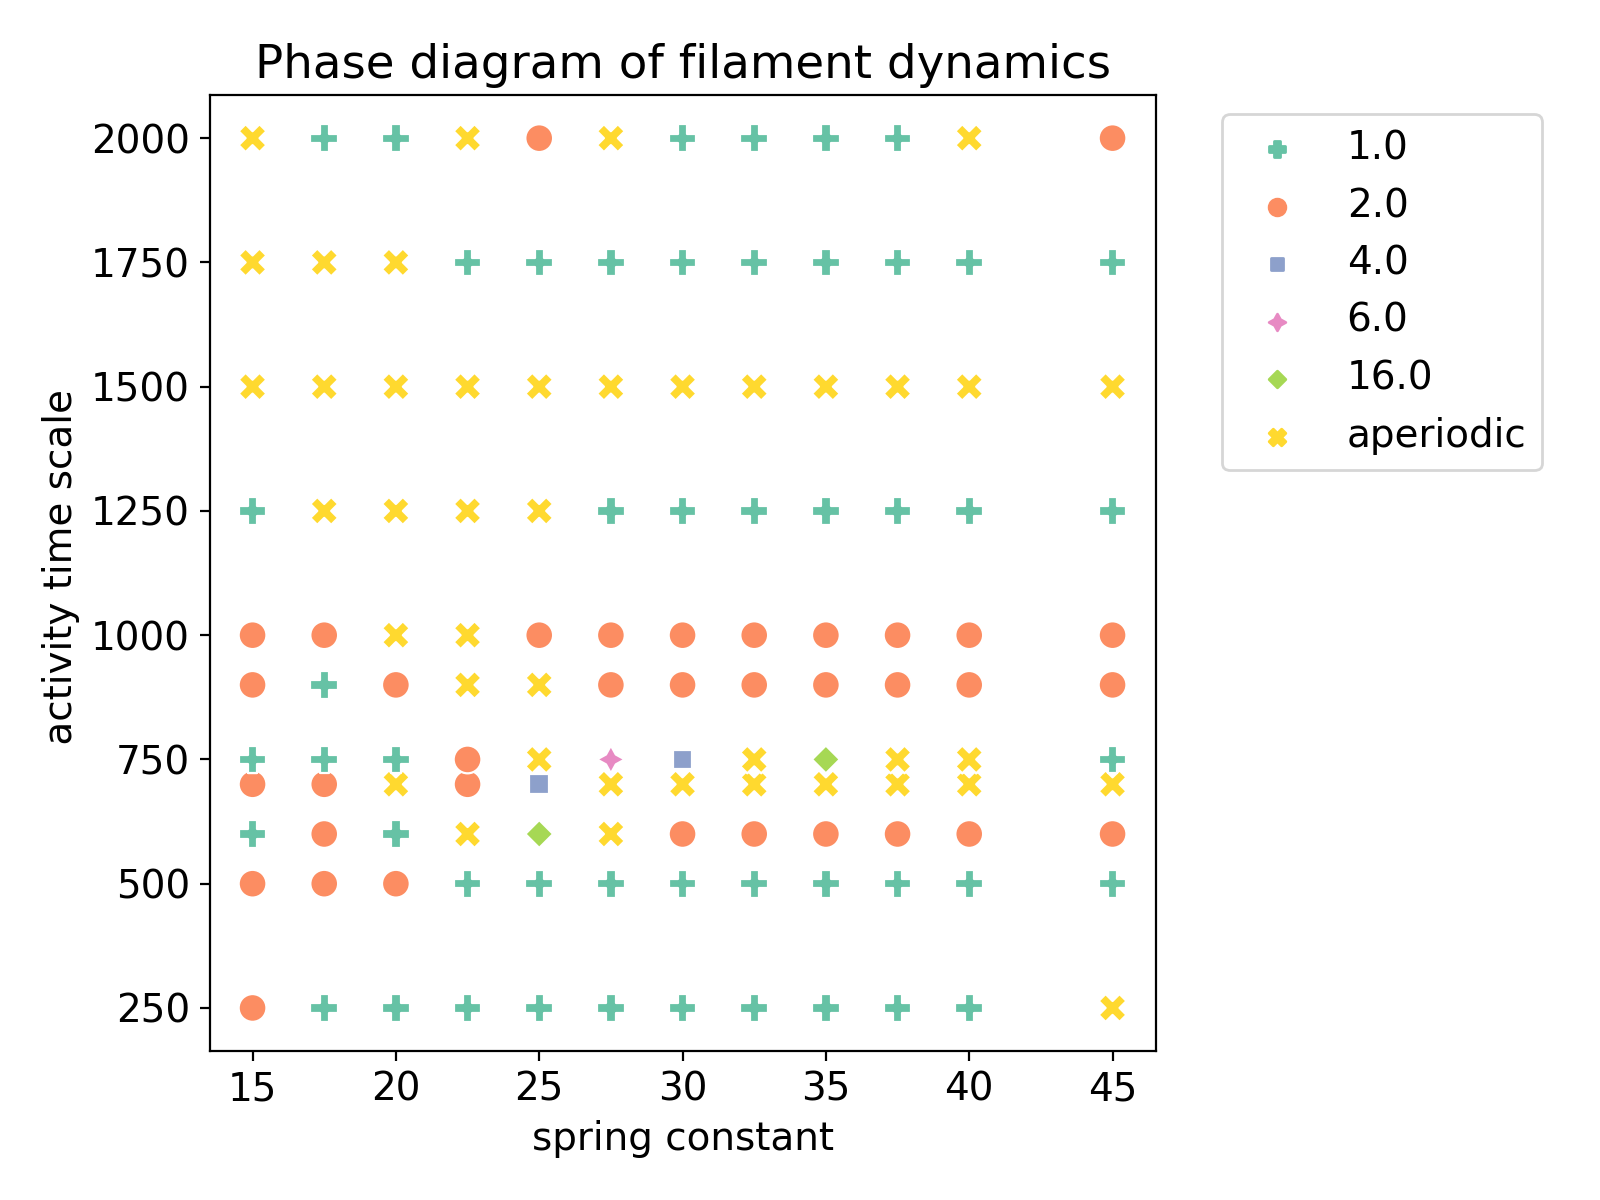

In [50]:
# Plot the max unique locations sampled vs filament stiffness and Activity Time-scale
save_folder = '/home/deepak/Dropbox/LacryModeling/AnalysisResults/CombinedAnalysis'

title = 'Phase diagram of filament dynamics'
fig, ax = plt.subplots(figsize=(8,6))
# sns.scatterplot(x="spring constant", y=" activity time scale", hue="max unique locations", size="max unique locations",
#             sizes=(40, 400), alpha=1, palette="flare", data=df, style = "period", ax = ax,style_order = [1.0, 2.0, 4.0, 6.0, 16.0, 'aperiodic'])
sns.scatterplot(x="spring constant", y=" activity time scale", hue="period",
            sizes=(400, 400), alpha=1, palette="Set2", data=df, style = "period", ax = ax,hue_order = [1.0, 2.0, 4.0, 6.0, 16.0, 'aperiodic'], s= 100)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title(title)
plt.tight_layout() 
plt.savefig(os.path.join(save_folder, title+'.png'), dpi = 300)
plt.savefig(os.path.join(save_folder, title+'.svg'), dpi = 300)

/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df

,Unnamed: 0,N particles,radius,bond length,spring constant,kappa_hat,force strength,stresslet strength,potDipole strength,simulation type,boundary condition 0,boundary condition 1,activity time scale,viscosity,Simulation time,CPU time (s),simulation completed,periodic dynamics,period,max unique locations
0,0,32,1,2.1,17.5,4.375,0,0,1.5,point,clamped,free,700,0.166667,350000.0,2129.869925,True,True,2,149.0
0,0,32,1,2.1,32.5,8.125,0,0,1.5,point,clamped,free,700,0.166667,350000.0,2799.508289,True,False,aperiodic,380.0
0,0,32,1,2.1,40.0,10.000,0,0,1.5,point,clamped,free,700,0.166667,350000.0,2804.603104,True,False,aperiodic,220.0
0,0,32,1,2.1,27.5,6.875,0,0,1.5,point,clamped,free,700,0.166667,350000.0,2700.650851,True,False,aperiodic,285.0
0,0,32,1,2.1,35.0,8.750,0,0,1.5,point,clamped,free,700,0.166667,350000.0,2782.562530,True,False,aperiodic,335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,32,1,2.1,25.0,6.250,0,0,1.5,point,clamped,free,1750,0.166667,875000.0,3446.716826,True,True,1,316.0
0,0,32,1,2.1,30.0,7.500,0,0,1.5,point,clamped,free,1750,0.166667,875000.0,4619.910863,True,True,1,189.0
0,0,32,1,2.1,32.5,8.125,0,0,1.5,point,clamped,free,1750,0.166667,875000.0,5450.831488,True,True,1,136.0
0,0,32,1,2.1,45.0,11.250,0,0,1.5,point,clamped,free,1750,0.166667,875000.0,5270.936569,True,True,1,142.0
